**GRIP @THE SPARKS FOUNDATION**


**Data Science & Business Analytics Internship**


**BATCH: OCTOBER 2023**


**Name: Punam Dahal**

#**Task1: Prediction Using Supervised ML**

What will be the predicted score if a student studies for 9.25 hrs/day?

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Reading the dataset using url
df = pd.read_csv('http://bit.ly/w-data')

#print the first five data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#print the number of rows and columns
df.shape

(25, 2)

In [ ]:
#print the columns name and type
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
#print the count , mean, median etc
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#print some more information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
#To check whether any null value or not
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**`Plotting of Graph`**

We use scatter plot to show relationship between two variables.

Text(0, 0.5, 'Score')

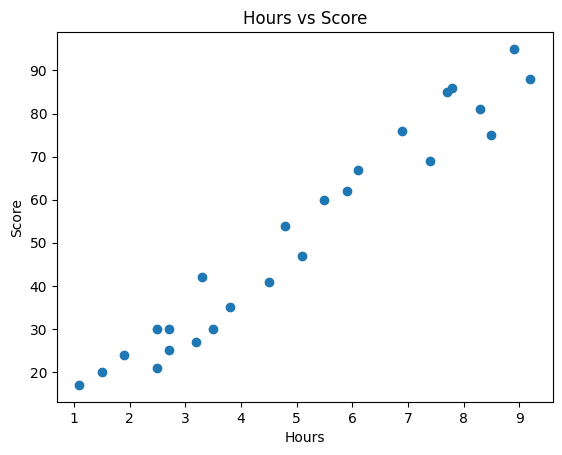

In [ ]:
#Ploting the distribution of scores
plt.scatter(df.Hours,df.Scores)
plt.title('Hours vs Score')
plt.xlabel('Hours')
plt.ylabel('Score')


From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.


In [ ]:
#Finding the corelation between the variables
df.corr()


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Linear** **Regression**


In [ ]:
#Separating the data into attributes (inputs) and labels(outputs)
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [ ]:
#Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)


In [ ]:
#Training Algorithm
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train , y_train)

print("Training complete.")

Training complete.


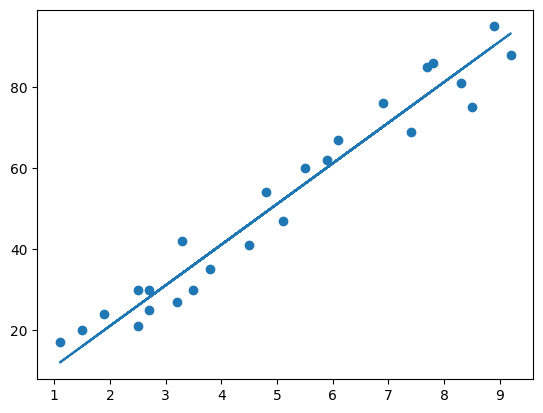

In [ ]:
# Plotting the regression line
from re import X
line = model.coef_*x+ model.intercept_

#plotting for the test data
plt.scatter(x, y)
plt.plot(x,line);
plt.show()

**Making Predictions**

Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)


[90.27915464 79.23661673 11.97752217 75.2211484  34.06259799 86.26368631
 49.12060424 33.05873091]


In [ ]:
#Comparing Actual vs Predicted Scores
df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Actual score vs Predicted Score:\n",df)

Actual score vs Predicted Score:
    Actual  Predicted
0      95  90.279155
1      86  79.236617
2      17  11.977522
3      69  75.221148
4      42  34.062598
5      75  86.263686
6      54  49.120604
7      27  33.058731


In [ ]:
Model_accuracy= model.score(x_train,y_train)
print("Model Accuracy is :", Model_accuracy)


Model Accuracy is : 0.9623919141966742


In [ ]:
# You can also test with your own data
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.792689434365


In [ ]:

# Calculate evaluation metrics
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score:",r2_score(y_test,y_pred))

Mean Absolute Error: 6.608383730582239
Mean Squared Error: 47.79342603239813
Root Mean Squared Error: 6.913278963878004
R2 Score: 0.930188764896189
